# Week 4: From Pandas to machine learning

<img width = "250" src="./images/hazel.png" align="right" style="padding-left:10px">

This week we will finish our tour of the data science ecosystem started in Week 3. 

Recall, Week 3 provided a brief overview of the main packages in the data science ecosystem, a discussion of virtual environments (including the creation of our first virtual environment `datasci`), and we explored two core packages: NumPy and Matplotlib. 

This week, we are going to round out our exploration of the data science ecosystem with a discussion of Pandas and scikit-learn. 

<a id="toc"></a>
- [1: Pandas for tabular data](#pandas)
- [2: scikit-learn for machine learning](#scikit-learn)

Incidentally, there is a good book on Python for data science that is free and available online: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). Unfortunatley, the material in that book is *way* too dense for a rapid crash course. However, when you get stuck or have questions, I encourage you to use it as a reference (along with Google).

<a id ="pandas"></a>
[Back to TOC](#toc)
# 5: Pandas for tabular data
We will be working through the excellent Pandas tutorial, written by Brendan Martin and others:

https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/ 

Note there are lots of great resources for Pandas if you want to triangulage and go beyond the tutorial. For instance:
- https://github.com/stefmolin/pandas-workshop 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

As with the other tutorials, I will shadow along here in the notebook, explaining tiny bits along the way, while you explore and modify code in your workspaces.

If you really are curious about Pandas, and want to do a deep dive, I strongly recommend Stefanie Moli's book [Hands-On Data Analysis with Pandas](https://www.amazon.com/Hands-Data-Analysis-Pandas-visualization/dp/1800563450). 

## Intro to Pandas
This is meant to cover the sections in the tutorial titled **What's Pandas for**, **How does pandas fit into the data science toolkit?**. These are helpful overview sections that hopefully will help explain what Pandas is all about. Basically, if you have a bunch of data and want to collect it together in columns (like an Excel spreadsheet), then Pandas is a great choice. In many ways it is better than Excel because it is way faster (built on top of NumPy), and has great built-in tools for analysis and plotting (built on top of Matplotlib). 

We have already installed pandas, so don't have to worry about that. As usual in Python, when you import pandas you use an alias (`pd`):

In [49]:
import pandas as pd
import numpy as np

## Core components of pandas: Series and DataFrames
This is the first substantive part of the tutorial. Frankly, the difference between a series and dataframe can be confusing (in particular, why do we need a separate `series` data class?). It isn't *too* dangerous to think of a series as a single column of data, while a dataframe is a full 2d table that includes a fuller repertoire of tools for analyzing and visualizing the data within that table. We will focus on dataframes, which you will use a lot more, and are a lot more intuitive.

### Creating dataframes from scratch
It is useful to be able to quickly create dataframes from scratch using a dictionary, so be sure to practice that in your workspace. I'm going to provide a simple example here of a dataframe to hold some data about a rat. This is the kind of thing I do in a workspace when I am learning a library:

In [50]:
rat1_image = np.random.rand(2,2)
rat2_image = np.random.rand(2,2)
rat3_image = np.random.rand(2,2)
rat_data = {'Behavior': [.0, np.nan, .1],
            'Genotype': [1, 0, 1],
            'Sex': ['M', 'M', 'F'],
            'Images': [rat1_image, rat2_image, rat3_image]}
rat_df = pd.DataFrame(rat_data, index=['Rat1', 'Rat2', 'Rat3'])
print('dataframe created')

dataframe created


We will revisit our rat dataframe later to emphasize some points. Notice the `np.nan` in the behavior array, that I've used both floats and ints (you can set floats by putting a decimal in a number and ints by not using decimals), and the fact that I've thrown in some "images" (2x2 numpy arrays in there). I did all this because the examples in the tutorial are very focused on text, and I thought it would be instructive to see how Pandas handles different types of numerical formats, which is much more common in neuroscience. 

For the different examples in the tutorial, I encourage you in your workspaces to make similar examples, or to build on and apply the methods to the `rat_df` example above. 

### Reading in data from CSVs
The tutorial goes over many ways to read in data: from csv, databases, and json files. This is great breadth, but please focus on csv files for now to save time. I have placed the two csv files in the `data/` folder in the repository, so when the tutorial says to load directly using `filename.csv` you should instead load using the relative filepath `./data/filename.csv`. For instance:

In [51]:
df = pd.read_csv('./data/purchases.csv')

Note as discussed in the tutorial, you will want to modify that with an `index_col` keyword in your workspace. Again, as I mentioned, please skip the sections on `JSON` and `SQL` databases, you are already doing plenty, and the majority of your data you work with will be csv.

### Converting a dataframe to CSV
Once you have a dataframe, it is easy to save it to CSV using the `to_csv()` method. This is extremely helpful, not just in the context of Pandas, but when working with numpy arrays. This is what I often do when working with calcium imaging data for instance. Pandas just provides a great API for handling data. Say we have calcium data and want to save it: Numpy is sometimes weird when it comes to saving data, while pandas simply works really intuitively. 

So, let's say we have a 1000 x 30 array (maybe each column is a calcium trace, and we have 30 neurons):

In [52]:
import numpy as np

our_data = np.random.rand(1000, 30)

And we want to save this as a csv file. It is really easy to quickly convert it to a Pandas dataframe, and export as a CSV:

In [53]:
pd.DataFrame(our_data).to_csv('./data/our_data.csv')

You will notice if you open that file up in Excel the first row represents the index of each row of the array (0...9999). If you don't want that in your csv file, you can add `index=None` to `to_csv()`. Also, the top row of the file is a header where each column is numbered `0...29`. If you don't want that you can add the keyword `header=None` to `to_csv()`. 

### Workspace for creating and saving Dataframes
Create dataframes, load from CSV, and save dataframes. Don't worry if you feel like you don't know what to do with them yet. That is coming next. 

In [54]:
# workspace to play with your first dataframes.

## Most important dataframe operations
The point of Pandas is that it makes it easy to explore and visualize your data. This section of the tutorial goes over most of those key operations.

The tutorial is cumulative in the sense that it builds on each step, so don't skip your steps. It sort of goes over the basic operations you would go through when you inherit a data set, so provides a nice introduction to the first steps in data analysis.

It provides an IMDB movie database, which I include in your data folder (be sure to load it from the data folder: the path will be slightly different from the tutorial, as mentioned above).

In [55]:
movies_df = pd.read_csv("./data/IMDB-Movie-Data.csv", index_col="Title")

### Viewing your data: head() and tail()
The `head()` method is always the first I use after I create a dataframe: first it lets me know if I have created it correctly, and it shows me the basic structure of the dataframe.

### Getting info about your data: info()
`info()` is almost as useful as `head()` as it provides a helpful summary of the dataframe, telling you how many entries (rows) the dataframe has, how many columns, the name of each column, the type of data in each column, and approximately how much memory the dataframe takes up.  

For each column, it tells you the number of *non-null* rows it contains (i.e., the number of rows that actually have values). You will see when you play with this in your workspace, that there are a couple of columns that are missing values. The tutorial will discuss this wrinkle soon.

*Note:* `info()` is not always super informative about your data types. When they are types whose size is not fixed (arrays, strings, etc), then it will just tell you the type is `object`. For instance, check out the output for our `rat_df` defined above:

In [56]:
rat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rat1 to Rat3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Behavior  2 non-null      float64
 1   Genotype  3 non-null      int64  
 2   Sex       3 non-null      object 
 3   Images    3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 120.0+ bytes


Notice that our `2x2` numpy arrays are given type `object`. 

### Workspace for head, tail, info
Be sure you are comfortable with exploring your dataframe using the `head()`, `tail()`, and `info()` methods. You can also check the `shape` attribute of a dataframe, just like you can a numpy array.

In [57]:
# play with heads, tails, and info


## An aside on data wrangling
The next couple of sections are about *data wrangling*. This is the stuff that people rarely talk about, but that data scientists spend probably 90% of their time doing. 

This involves things like handling duplicate data (duplicate rows in tables), missing data points, and how to tweak names (e.g., spaces in names often cause errors in many software packages).

As I mentioned above, this tutorial is cumulative, so you do not want to skip these sections, as the later bits of the tutorial will make use of the bits you do here. Luckily Pandas makes data wrangling relatively quick and painless.

### Handling duplicates: drop_duplicates()
The tutorial has a really nice section on handling duplicates: I personally don't run into this a lot with my neural data, but when you download data from the Wild West, you will see it quite a bit. It is really easy to quickly get rid of duplicate data in a dataframe with `df.drop_duplicates()`, as discussed in the tutorial.

In [58]:
# workspace for handling duplicates

### Column name cleanup
This section of the tutorial goes over multiple ways to clean up or change column names. There is a lot going on, so it deserves its own workspace. Generally, it is a pain to have column names that are too long, with spaces, that make it hard to see a compact representation when you use `df.head()` in your notebooks. Spaces in names, in particular, can wreak havoc with some software packages and throw errors. Also, many people like to have consistency in terms of upper/lower case etc.. This is aesthetically pleasing, but also makes things more predictable and easy to work with. 

You can always inspect the columns of a dataframe with `df.columns`.

In [59]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

As discussed in the tutorial, there are a couple of ways you can rename columns:
- Use the `df.rename()` method, feeding it the `column` keyword with a dictionary containing the old name/new name as key/value pairs (be sure to set `inplace=True` to change the dataframe in memory). 
- Rename directly with a list `df.columns = [list_of_columns]` where `[list_of_columns]` is a list of strings containing the column names you want. 


### Let's talk about comprehensions
The list comprehension method the tutorial discusses is a special case of renaming with a list.

List comprehension in Python is an extremely efficient way to create a new list from an original/source list. It does this by iteratively applying the same function to each element of the original list, and the resulting set of new elements is pushed into a new list. 

It uses the following syntax:

    new_list = [function(elt) for elt in original list]

Basically, each element of `original_list` is pushed into `new_list` after `function()` is applied to it. This may all seem pretty abstract, so let's learn it by looking at a couple of really simple examples. 

First, let's square each element of a list (recall you can square a number `x` in Python with `x**2`):

In [60]:
original_list1 = [1, 2, 3, 4, 5, 6, 7, 8]
squared_list = [elt**2 for elt in original_list1]
print(original_list1)
print(squared_list)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 4, 9, 16, 25, 36, 49, 64]


Second, closer to the example in the tutorial, let's say we want to get the lower case of every element in a list of strings:

In [61]:
food_list = ['Egg', 'Orange Juice', 'Toast', 'Oatmeal Pancakes']
lower_list = [food.lower() for food in food_list]
print(lower_list)

['egg', 'orange juice', 'toast', 'oatmeal pancakes']


This is what the tutorial uses for renaming columns (this trick exploits the fact that  when you iterate over a pandas dataframe in Python, it returns the column names).

## Workspace for column cleanup
As mentioned in the tutorial, it is a good idea to convert your column names to lowercase, get rid of spaces, and get rid of special characters (like parentheses) in column names. Hence, be sure you follow along in the cleanup of column names for the `movie_df` examples, as they will be used in the rest of the tutorial. 

I strongly encourage you to play with list comprehension too, it is one of the cooler tricks in Python. 

In [62]:
# column cleanup workspace

In [63]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [64]:
# create new column names to remove special characters
new_col_names = {'Runtime (Minutes)': 'Runtime',
                 'Revenue (Millions)': 'Revenue_millions'}
new_col_names

{'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)': 'Revenue_millions'}

In [65]:
# rename with dict of new names, be sure inplace=True
movies_df.rename(columns=new_col_names, inplace=True);

# check that it worked
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [66]:
# show that if you loop through df it prints columns
for val in movies_df:
    print(val)

Rank
Genre
Description
Director
Actors
Year
Runtime
Rating
Votes
Revenue_millions
Metascore


In [67]:
# use list comprehension to turn to lower case
movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Working with missing values: removal or imputation (or none of the above)
When you inherit a dataset there will often be values missing for some columns. How do you handle that? 

 There are a few options people tend to use in Pandas:

1. Drop the *rows* with null values using `df.dropna()`.
2. Drop *columns* that contain null values using `df.dropna()` with `axis=1` keyword.
3. Use *imputation* to fill in/replace the null values with some other value like the mean of the non-null values in that column.
4. Just leave them in there and calculate your aggregate statistics with the remaining, non-null, values.

The tutorial is pretty good in that it discusses all of the above options, but bear in mind they are not all equally reasonable in all contexts.

As an aside: I'm a big fan of the fourth option, as I don't really buy into the assumption that missing data is some urgent problem you have to "handle". Especially with numerical data, I prefer to just leave NaN's there and work with them. Ablating data (options 1 and 2), or adding in pseudodata (option 3) just so you can smile when you have no non-null values when you run `df.info()` is an extreme measure that shouldn't be taken lightly. 

Recall that `df.info()` tells you, for each column, how many non-null values it contains. 

In [68]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   genre             1000 non-null   object 
 2   description       1000 non-null   object 
 3   director          1000 non-null   object 
 4   actors            1000 non-null   object 
 5   year              1000 non-null   int64  
 6   runtime           1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   votes             1000 non-null   int64  
 9   revenue_millions  872 non-null    float64
 10  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


As described in the tutorial, you can count the number of null values in each column of a dataframe, and this should complement the result of `df.info()`:

In [69]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

You can then decide what you want to do with them. The tutorial has a very nice example of how to use imputation to replace the null values in `revenue_millions` with the mean values from the non-null rows. It leaves the `metascore` column with the null values there. I recommend working through the imputation section:

In [70]:
# workspace for "fixing" missing revenue values with imputation

In [71]:
revenue = movies_df.revenue_millions
type(revenue)  # you have just extracted a series

pandas.core.series.Series

In [72]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [73]:
revenue_mean = revenue.mean()
print(revenue_mean)

82.95637614678898


In [74]:
revenue.fillna(revenue_mean, inplace=True)
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

### We're done wrangling our data: now what?
So let's assume we are happy with our data wrangling: that is, we have renamed our columns so they are all lower case and have no spaces (yeah!), removed missing values from the `revenue_millions` column for some reason, and luckily didn't have any duplicate rows to deal with. 

When we have finished wrangling our data, we are saying we are basically done poking and prodding it, and are ready to start *analyzing* it. Data analysis can get really complex and esoteric, but it almost always involves the same two basic steps:

- Do simple descriptive statistics on individual variables and relationships between variables.
- Visualize your variables. 

Pretty much no matter how fancy your data gets, you typically will do something like the above steps when you first inherit some data. Luckily, Pandas makes this really easy for the type of tabular data it caters to.

### Understanding your continuous variables: describe()
As just mentioned, when first examining a data set, we usually want to do some simple descriptive statistics on our variables. This is built in to Pandas: the `describe()` method will spit out the mean, standard deviation, min, max, median, and other statistics for each column that contains numerical data:

In [75]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


If you apply `describe()` to columns that contains a string or another categorical variable, you will get a relatively simple analysis of the number of categories:

In [76]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

For such categorical data, a more useful method that provides a more detailed breakdown of the number in each category, a more useful method is `value_counts()`:

In [77]:
movies_df.genre.value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: genre, Length: 207, dtype: int64

### Looking at pairwise correlations between variables
In addition to basic descriptive stats on individual variables, we often want to know basic pairwise stats on the numerical variables in the dataframe. This is provided with `df.corr()`:

In [78]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


## Workspace for exploring data
Play around with describe, value_counts, and corr

In [79]:
# workspace to exploring data

## Dataframe slicing, selecting, extracting
As we learned with numpy, it is often really important to be able to select subsets of data (e.g., what if you want to select data for just a particular animal to analyze?). This is also important for dataframes. 

There are a few ways to extract subsets of data from Pandas dataframes.


### Extracting individual columns by name
Here the tutorial discusses how to extract a single column as a series, or dataframe.

Note it doesn't discuss the common dot notation where you can extract a single column as a series using `data_frame.column_name`. Using our rat dataframe, for instance, we can extract the `Behavior` column as a series as follows:

In [80]:
rat_df.Behavior

Rat1    0.0
Rat2    NaN
Rat3    0.1
Name: Behavior, dtype: float64

Alternatively, you can extract a column as a series by directly putting the column header name in brackets:

In [81]:
rat_df['Behavior']

Rat1    0.0
Rat2    NaN
Rat3    0.1
Name: Behavior, dtype: float64

To extract a column as a *dataframe*, put the column name in a list. This also allows you to put multiple column names in a list:

In [82]:
subset_df = movies_df[['genre']]
subset_df.head()

,genre
Title,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi"
Prometheus,"Adventure,Mystery,Sci-Fi"
Split,"Horror,Thriller"
Sing,"Animation,Comedy,Family"
Suicide Squad,"Action,Adventure,Fantasy"


Why don't you play with extracting individual columns now.

In [83]:
# Workspace for directly extracting column(s) of data, either as a series or dataframe

### Extracting "rows" (more accurately: indexing by label or by integer)
Pandas has two useful ways to extract subsets of rows and columns (for some reason the tutorial just goes over the interface for rows, but often you will want to extract rows and columns). It can sometimes be confusing to remember these two different methods, but basically you can select by *label* or by *index*:

- To select by *label* use `loc`. 
- To select using more traditional integer-based indexing, use `iloc` (the `i` is for integer).

For a *really* good overview of the topic of indexing in Pandas, see the following little tutorial, that has great diagrams and is very conceptually clear (ignore the discussion of `ix`, which is an outdated method):    
https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/amp/

### Access via label: loc
Let's take a look at our movie dataframe:

In [84]:
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


The title is the label for each row, and we can access a row by its label using `loc`:

In [85]:
prom_movie = movies_df.loc["Prometheus"]

This returns a single row. As before, if you want a dataframe you can feed it a list. 

Interestingly, you can slice over multiple rows:

In [86]:
movie_subset = movies_df.loc["Prometheus": "Sing"]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


A couple of things to note: first, the `loc` method uses square brackets instead of parentheses like most python methods. This is to stress that it is an indexing operation for selecting data. 

Second, when you slice data using `loc['first':'last']` *the `last` element is included*, which is contrary to everything we have done in Python. This is because when indexing by labels it is sometimes hard to know what comes *after* the element you actually want. Instead of blindly sticking to Python convention, the developers of Pandas decided to make things easier. This issue is discussed in the documentation here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#endpoints-are-inclusive

Third, I'm not sure why the tutorial suggests you only select rows by label: you can also select *columns* by label:

In [87]:
col_subset = movies_df.loc[:, 'genre':'director']
col_subset.head()

,genre,description,director
Title,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn
Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott
Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan
Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet
Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer


You can also select both columns *and* rows by label using `loc`:

In [88]:
both_subset = movies_df.loc['Prometheus': 'Sing', 'genre':'director']
both_subset.head()

,genre,description,director
Title,,,
Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott
Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan
Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet


### Access via integer: iloc
`iloc` is similar to `loc`, except the indexing is by integer like in NumPy arrays or lists. Like the rest of Python, the second element is *not* included. Because you are more familiar with these, we will just give a couple of examples (and note just like with `loc`, you can index both rows and columns, not just rows):

In [89]:
rows_df = movies_df.iloc[1:4]
rows_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


Note the final element is not included.

And an example selecting both rows and columns:

In [90]:
rows_cols_df = movies_df.iloc[1:4, 1:2]
rows_cols_df.head()

,genre
Title,
Prometheus,"Adventure,Mystery,Sci-Fi"
Split,"Horror,Thriller"
Sing,"Animation,Comedy,Family"


There we have the basics of selecting subsets of rows and columns. 

### Workspace for subset selection
In the workspace, I recommend you play around with `loc` and `iloc` just to be sure you understand the basics. While they are relatively simple, it is useful to understand the little differences and to take the time to start building some muscle memory now!

In [91]:
# workspace for selecting subsets of dataframes

### Conditional selections (filter by boolean series)
Picking entire rows and columns is really important, but picking *subsets* of rows that meet combinations of conditions is extremelyl common: e.g., analyze data from males of a certain genotype. This is the last topic in selecting subsets of data.

This will require you to dust off your memory of Boolean values and operators from ATBS Chapter two (which you went over in Week 1). 

As discussesd in the tutorial, in Pandas you can use expressions on columns to extract different rows, like extracting all the movies directed by Ridley Scott.

As mentioned in the tutorial, the *first* thing you do is get a series of truth values with something like the following:

In [92]:
scott_rows = (movies_df['director'] == "Ridley Scott")

The above is a series that returns `True` for rows where the directory column is "Ridley Scott", `False` otherwise (note I put parentheses around the expression on the right hand side for reasons that will become clear even though they are not technically necessary when only selecting for a single condition):

In [93]:
scott_rows.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Then to actually *use* that series of truth values to create a dataframe of Ridley Scott movies, we basically use that series as an index for the dataframe:

In [94]:
scott_df = movies_df[scott_rows]
print(len(scott_df))
scott_df.head()

8


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


What if you want to select for multiple conditions? You can combine them. Let's say we want to pull all movies directed by Steve McQueen:

In [95]:
mcqueen_rows = (movies_df['director'] == "Steve McQueen")
mcqueen_df = movies_df[mcqueen_rows]
mcqueen_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
12 Years a Slave,112,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0
Shame,420,Drama,A man's carefully cultivated private life is d...,Steve McQueen,"Michael Fassbender, Carey Mulligan, James Badg...",2011,101,7.2,155010,4.00,72.0
Hunger,687,"Biography,Drama",Irish republican Bobby Sands leads the inmates...,Steve McQueen,"Stuart Graham, Laine Megaw, Brian Milligan, Li...",2008,96,7.6,54486,0.15,82.0


To pull all movies that were directed by either McQueen *or* Scott, we can do an *element-wise* boolean or operator*, that will compare each element of the series: if one is True, then it will return True, if both are False, it returns False. The symbol for this element-wise or is the vertical line:

In [96]:
scott_or_lynch_rows = mcqueen_rows | scott_rows
scott_or_lynch_df = movies_df[scott_or_lynch_rows]
scott_or_lynch_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
12 Years a Slave,112,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
Shame,420,Drama,A man's carefully cultivated private life is d...,Steve McQueen,"Michael Fassbender, Carey Mulligan, James Badg...",2011,101,7.2,155010,4.00,72.0


If we wanted to do an element-wise boolean *and* operation, we would use an ampersand `&` instead of the word `and` (we don't want to do that for our directors because there are no movies directed by both Nolan and McQueen). 

The tutorial does a good job showing how to chain together the boolean `&` operators to narrow down rows of the dataframe. Note that when chaining them together, you have to put the different conditions in paretheses, which is why I put individual conditions in paretheses above (it is a good habit to get into: it is pretty rare that you just want to select on one condition).

### Workspace for conditional Selections
This is an important concept, so be sure you understand how it works and build up some basic muscle memory!

In [97]:
# workspace for conditional selections

### Applying functions to rows and create new rows: apply()
This section is quite important, and really covers two topics in one. 

1. How do you create a new column in a dataframe? Often you will want to create a new column that is *derived from* other columns. 
2. How do you do such derivations in a *computationally efficient* way? 

This section of the tutorial wraps both of these questions together, showing you how to use Pandas built-in `apply()` method to apply code to all of the rows of pre-existing columns in order to push the results into new columns. 

While you might be tempted to use a Python `for` loop to manually apply a function to every row of a column, and insert the result to a new column, this is pretty slow. Pandas built-in `apply()` method is much faster (it is said to *vectorize* the operation, applying it to all of your data at once instead of going through a traditional loop). In general, it is much faster to vectorize operations than to run things through a home-grown for loop.

The tutorial has a nice example of how to do this, applying a function (`rating_function()`) to each element of the `rating` column and converting it to a rating *category* (`good` if above 8, otherwise `bad`). Be sure you work through this helpful practical example in the workspace!  

(Note for now don't worry about the lambda function stuff that is a more advanced topic. For now, I recommend using the explicit separate definition using `def rating_function()` to make sure you grasp the concepts involved). 

**Bonus workspace question**   
After following the example creating a `rating_category` column, use conditional selection from the previous section to create a data frame that contains only `good` movies. What percentage of movies are good?

In [62]:
# workspace for apply()

In [98]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

In [99]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

In [100]:
good_rows = (movies_df["rating_category"] == "good")
good_df = movies_df[good_rows]
print(len(good_df), len(movies_df))
good_df.head(len(good_df))

78 1000


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,good
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0,good
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.120000,71.0,good
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.690000,69.0,good
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.500000,81.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...
El secreto de sus ojos,743,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.170000,80.0,good
PK,766,"Comedy,Drama,Romance",A stranger in the city asks questions no one h...,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2014,153,8.2,103279,10.570000,51.0,good
How to Train Your Dragon,773,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.390000,74.0,good


## Plotting in Pandas
Pandas has powerful built-in plotting capabilities to visualize your dataframe. It is built on Matplotib, which is nice, as it means you can modify your plots using the tools you learned in week 3. Before jumping into plotting, One useful trick we didn't go over in Week 3 for Matplotlib is setting default settings for all your plots by feeding a dictionary of parameters to `rcParams.update()` (`rc` stands for 'runtime configuration'):

In [185]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13,
                     'figure.figsize': (10,8)})

There are a couple of ways to plot from a dataframe. 

First, as discussed in the tutorial, you can use `df.plot()` and use the `kind` keyword argument (e.g., `kind='scatter'`) to specify the type of plot. This is helpful for quickly exploring different kinds of plots, or if you want to send a program a text string of a type of plot you want to draw.  

The valid values of `kind` are enumerated here:    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Second, you can be more explicit in your function call with `df.plot.plot_type()` where "plot_type" is the kind of plot you want to draw (the same as the values of `kind` from above). This second way of plotting makes it easy to get help as you can enter:

    df.plot.<plot_type>?
    
in your notebook or google to find the documentation about that particular type of plot. You can always enumerate the different types of plots by entering `df.plot.` and hitting the tab key in your notebook.

Let's check out an example.

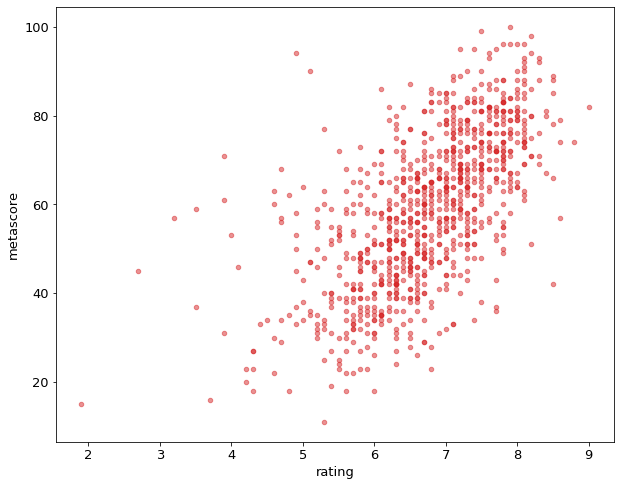

In [140]:
movies_df.plot.scatter(x='rating', 
                       y='metascore', 
                       alpha=0.5,
                       color='tab:red');

As expected, two of the rating values are very highly correlated. 

What about rating and revenue?

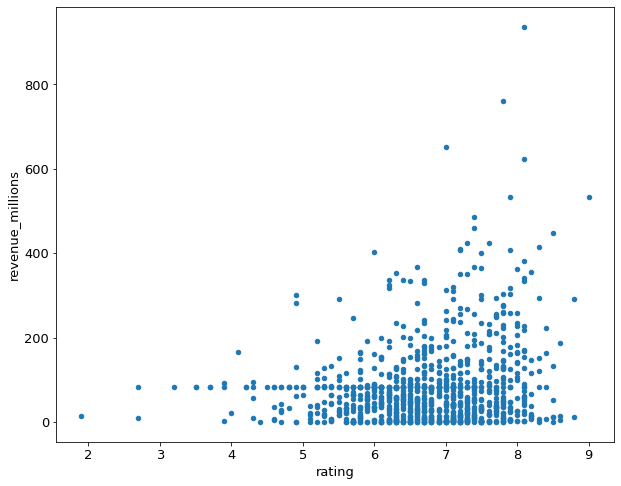

In [187]:
movies_df.plot.scatter(x='rating', 
                       y='revenue_millions');

These look correlated, but there are so many points smashed together with low revenue, it is hard to tell. Let's improve the plot in a few ways:
- Change the y axis to logarithmic scale to pull apart the values.
- Improve the titles.
- Change the alpha value so overlapping points are darker.
- Use matplotlib to add some lines for key values of revenue (and to show how to mix Matplotlib with Pandas).

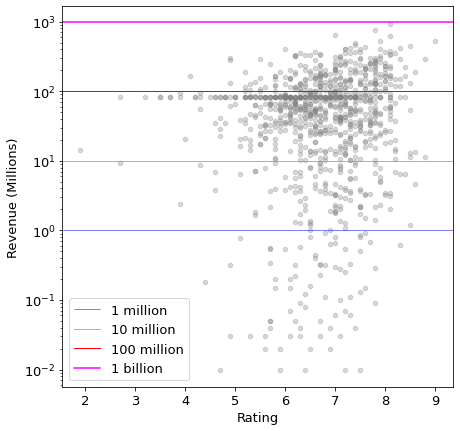

In [192]:
movies_df.plot.scatter(x='rating', 
                       y='revenue_millions', 
                       alpha=0.3,
                       color='tab:grey',
                       logy=True,
                       title="$ vs Rating",
                       xlabel="Rating",
                       ylabel="Revenue (Millions)",
                       figsize=(7,7))
plt.axhline(1, 
            color='blue', 
            linewidth=0.5,
            label='1 million');
plt.axhline(10, 
            color='lime', 
            linewidth=0.75,
            label='10 million');
plt.axhline(100, 
            color='red', 
            linewidth=1,
            label='100 million');
plt.axhline(1000,
            color='magenta',
           label='1 billion')
plt.legend()
plt.title('');

Now we can see just how messy the relationship is. There are many poorly rated movies that make a **lot** of money.

Now if you want to do something to a *single column* like draw a histogram to show the distribution of the values of a variable, things are a little different. You select just the single column instead of the entire dataframe, and then run the plot method on it you want (otherwise plotting the hist will try to plot histograms of all the values in your dataframe simultaneously and it will look absolutely horrible):

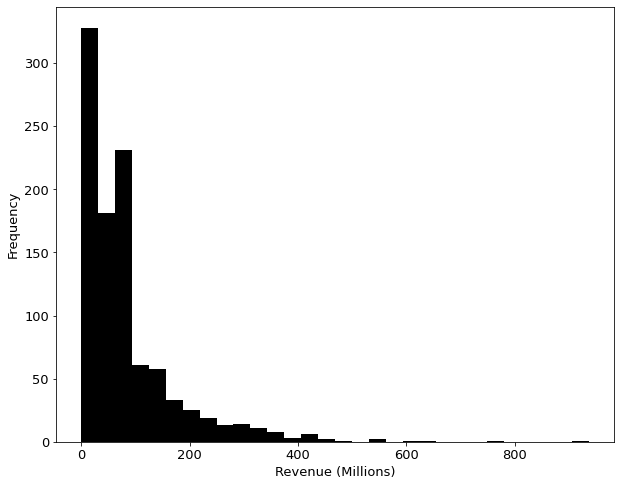

In [201]:
movies_df['revenue_millions'].plot.hist(bins=30, color='black');
plt.xlabel("Revenue (Millions)");  #adding label because bug in pandas

Or you could show the probability of different ratings using kernel density estimation (kde):

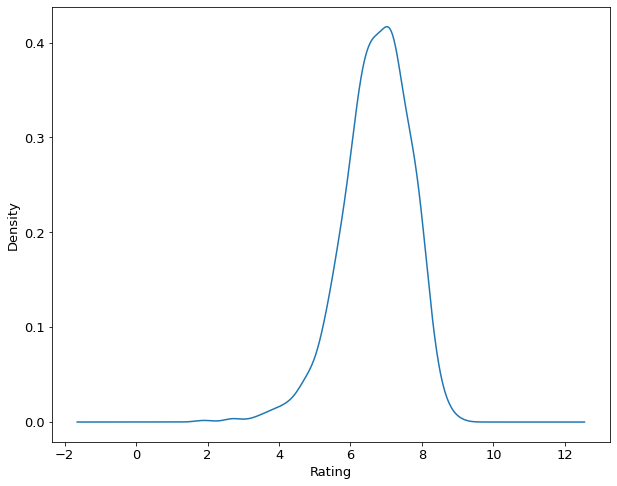

In [202]:
movies_df['rating'].plot.kde(xlabel="Rating");
plt.xlabel("Rating");

The boxplot, which the tutorial goes over, has a nice way to break things down by subcategories. For instance, if you want to see revenue broken down by rating category (the column we created above):

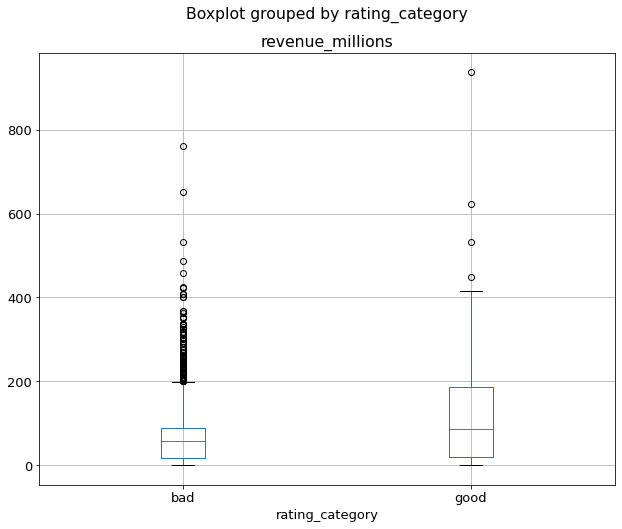

In [153]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

Unfortunately this way of breaking things down by category doesn't work for most of the plotting functions, and I'm not sure why. 

For instance if you try to draw a histogram with this syntax you will just get an error. The only way I'm aware of doing something like that with histograms is more complicated (e.g., one way would be to use conditional selections followed by two separate hist operations on the same plot, setting alpha to 0.5: *this would be a great exercise for an ambitious workspace exercise*!). 

### Workspace for plotting
I recommend playing with the different ways of plotting, just to be sure you are familiar with them. Also, if you like Pandas and think you will use it, I recommend the exercise from the previous paragraph. It is a pretty good representation of the type of challenge you will face with data visualization in real life. 

In [ ]:
# workspace for plotting

### Additional resources for plotting with Pandas
Strangely, the tutorial sort of ran out of steam once it started to go over plotting. It sort of was like "Sorry I'm done now I'm tired." If you want more on plotting in Pandas:

- https://realpython.com/pandas-plot-python/
- https://neptune.ai/blog/pandas-plot-deep-dive-into-plotting-directly-with-pandas

## I should really add something with seaborn it is truly magic

### Extracting data as numpy arrays: to_numpy()
One thing the Pandas tutorial doesn't go over, that I find extremely helpful and important is how to convert it to numpy arrays. I do this all the time when I inherit code that provides analysis of dataframes and I just want to convert back to a format that I am more comfortable with (which is usually NumPy arrays and Matplotlib). 

You can convert entire Pandas dataframes, or pull out individual columns (using the selection/indexing we went over above), and then just convert to numpy:

In [203]:
my_happy_place = movies_df['rating'].to_numpy()

Yippee now I can use NumPy and Matplotlib on this data and not have to remember Pandas stuff!

(1000,)


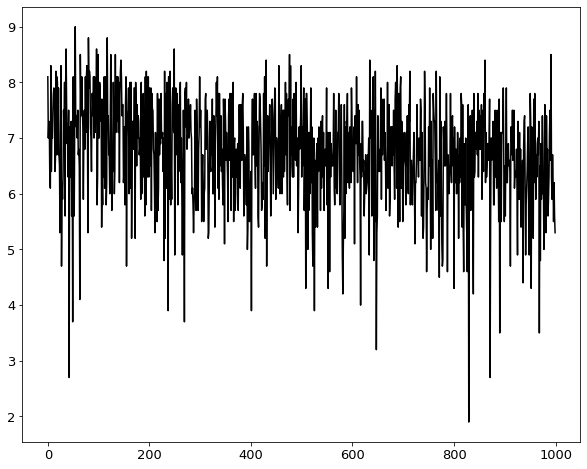

In [184]:
print(my_happy_place.shape)
plt.plot(my_happy_place, color='k');

Seriously, though about 50% of people prefer Pandas to Numpy/Matplotlib. It likely depends on the type of data you are using, and your personal preferences. Just do what you feel will make you most efficient and help you get your science done the fastest. 

## Congrats!
You have seen the basics of the dataframe creation, loading/saving, basic operations. Pandas, like NumPy, is a vast library, so we couldn't fully do it justice here, but we have hopefully given you a taste of the possibilities, especially for speeding things up with common tools for wranging, analysis, and visualization of your data. 

While this is a simplification, I have noticed there tend to be two types of people; those that prefer to do their analysis using NumPy and Matplotlib, and those that prefer to take advantage of the convenience of Pandas. Hopefully this notebook, by including a bit from all three, will give you a sense of what you might prefer moving forward. 